In [1]:
import keras
import numpy as np
from tflearn.datasets import cifar10
from keras.optimizers import SGD
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Softmax, ZeroPadding2D
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Reshape, GlobalAveragePooling2D, GlobalAveragePooling1D
from keras.optimizers import Adam
from keras.initializers import RandomNormal
import matplotlib.pyplot as plt
import pandas as pd
import datetime

Using TensorFlow backend.


In [2]:

# Hyperparameters
batch_size = 64
num_classes = 10 #pegar automaticamente NumPy.Unique
epochs = 200



In [3]:
# Load Cifar-10 Data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


#

x_train.shape
img_height, img_width, channel = x_train.shape[1],x_train.shape[2],x_train.shape[3]
#channel=1



In [4]:

#
x_train.shape

#


(50000, 32, 32, 3)

In [5]:
# convert to one hot encoing 
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)



In [6]:
img_width

32

In [7]:
model = Sequential()
#Filters = IMG_width/2 * 7
model.add(Conv2D(112, #alterado de 192 pra 112
                 (5,5), #alterado de 3 para 5 
                 strides=(2,2), 
                 activation='relu', 
                 padding='same',
                 data_format='channels_last',
                 use_bias=True, 
                 kernel_initializer=RandomNormal(mean=0.0, stddev=0.05, seed=None), 
                 bias_initializer='zeros',
                 input_shape=(img_height, img_width, channel)))
model.add(MaxPooling2D(pool_size=(2, 2), 
                       strides=(2,2)))
#model.add(BatchNormalization())
#calculo da quantidade de filtros da normalização:
# Width*heigth da saída após a primeira camada de convolução+pooling
######### RESIZED ###########
model.add(Conv2D(96, 
                 (1,1),  
                 strides=(1,1), 
                 activation='relu', 
                 padding='same',
                 kernel_initializer=RandomNormal(mean=0.0, stddev=0.05, seed=None), 
                 data_format='channels_last'))
######### RESIZED ###########

model.add(Conv2D(96, 
                 (1,1),  
                 strides=(1,1), 
                 activation='relu', 
                 padding='same',
                 kernel_initializer=RandomNormal(mean=0.0, stddev=0.05, seed=None), 
                 data_format='channels_last'))
model.add(Dropout(0.5))

          
#Filters = IMG_width/2 * 9
model.add(Conv2D(144, #alterado de 128 para 144
                 (5,5), 
                 strides=(2,2), 
                 activation='relu', 
                 padding='same',
                 data_format='channels_last',
                 use_bias=True, 
                 kernel_initializer=RandomNormal(mean=0.0, stddev=0.05, seed=None), 
                 bias_initializer='zeros',
                 input_shape=(img_height, img_width, channel)))
model.add(MaxPooling2D(pool_size=(2, 2), 
                       strides=(2,2)))
#model.add(BatchNormalization())
######### RESIZED ###########
model.add(Conv2D(96, 
                 (1,1),  
                 strides=(1,1), 
                 activation='relu', 
                 padding='same',
                 kernel_initializer=RandomNormal(mean=0.0, stddev=0.05, seed=None), 
                 data_format='channels_last'))
######### RESIZED ###########

model.add(Conv2D(96, 
                 (1,1),  
                 strides=(1,1), 
                 activation='relu', 
                 padding='same',
                 kernel_initializer=RandomNormal(mean=0.0, stddev=0.05, seed=None), 
                 data_format='channels_last'))
model.add(Dropout(0.5))

          
          

#IMG_width^ 2
model.add(Conv2D(1024, 
                 (1,1),  
                 strides=(1,1), 
                 activation='relu', 
                 padding='same',
                 kernel_initializer=RandomNormal(mean=0.0, stddev=0.05, seed=None), 
                 data_format='channels_last'))
model.add(Dropout(0.5))

#camada anterior/
model.add(Conv2D(512, 
                 (1,1),  
                 strides=(1,1), 
                 activation='relu', 
                 padding='same',
                 kernel_initializer=RandomNormal(mean=0.0, stddev=0.05, seed=None), 
                 data_format='channels_last'))
model.add(Dropout(0.5))

model.add(Flatten())
#Num de classes
model.add(Dense(10, activation='softmax'))


In [8]:

# print the model summary
model.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 16, 16, 112)       8512      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 112)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 96)          10848     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 96)          9312      
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 96)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 4, 144)         345744    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 144)         0         
__________

In [9]:
# determine Loss function and Optimizer
model.compile(loss='categorical_crossentropy', #alterado de logcosh
              optimizer=SGD(lr=0.01, momentum=0.01, decay=0.0, nesterov=False),
              metrics=['accuracy'])


In [10]:

# Train the Model
#earlyStopping=keras.callbacks.EarlyStopping(monitor='val_acc', min_delta=0, patience=13, verbose=1, mode='auto')
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
 #                   callbacks=[earlyStopping],
                    validation_data=(x_test, y_test))



Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 84s 2ms/step - loss: 2.3023 - acc: 0.1039 - val_loss: 2.3022 - val_acc: 0.1229
Epoch 2/200
50000/50000 [==============================] - 83s 2ms/step - loss: 2.3009 - acc: 0.1105 - val_loss: 2.3007 - val_acc: 0.1424
Epoch 3/200
50000/50000 [==============================] - 83s 2ms/step - loss: 2.2923 - acc: 0.1117 - val_loss: 2.2860 - val_acc: 0.2027
Epoch 4/200
50000/50000 [==============================] - 83s 2ms/step - loss: 2.2081 - acc: 0.1792 - val_loss: 2.1483 - val_acc: 0.2356
Epoch 5/200
50000/50000 [==============================] - 84s 2ms/step - loss: 2.1082 - acc: 0.2293 - val_loss: 2.1712 - val_acc: 0.1860
Epoch 6/200
50000/50000 [==============================] - 84s 2ms/step - loss: 2.0608 - acc: 0.2325 - val_loss: 2.0279 - val_acc: 0.2370
Epoch 7/200
50000/50000 [==============================] - 84s 2ms/step - loss: 2.0226 - acc: 0.2385 - val_loss: 2.0303 - 

50000/50000 [==============================] - 85s 2ms/step - loss: 0.8872 - acc: 0.6812 - val_loss: 1.2911 - val_acc: 0.5470
Epoch 118/200
50000/50000 [==============================] - 85s 2ms/step - loss: 0.8794 - acc: 0.6836 - val_loss: 1.4883 - val_acc: 0.4988
Epoch 119/200
50000/50000 [==============================] - 85s 2ms/step - loss: 0.8802 - acc: 0.6837 - val_loss: 1.4121 - val_acc: 0.5166
Epoch 120/200
50000/50000 [==============================] - 84s 2ms/step - loss: 0.8740 - acc: 0.6894 - val_loss: 1.8004 - val_acc: 0.4087
Epoch 121/200
50000/50000 [==============================] - 86s 2ms/step - loss: 0.8714 - acc: 0.6875 - val_loss: 1.4506 - val_acc: 0.5060
Epoch 122/200
50000/50000 [==============================] - 86s 2ms/step - loss: 0.8714 - acc: 0.6877 - val_loss: 1.2843 - val_acc: 0.5550
Epoch 123/200
50000/50000 [==============================] - 85s 2ms/step - loss: 0.8620 - acc: 0.6911 - val_loss: 1.5959 - val_acc: 0.4775
Epoch 124/200
50000/50000 [=======

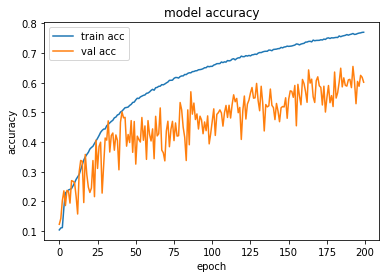

In [11]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train acc','val acc'], loc='upper left')
plt.show()

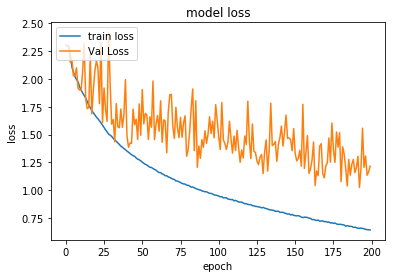

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss','Val Loss'], loc='upper left')
plt.show()

In [13]:
# Test the model
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.21690526314
Test accuracy: 0.6015


In [14]:
print(history.history)

{'val_loss': [2.3021529983520508, 2.3006743618011476, 2.2860461738586424, 2.1483001861572264, 2.1712201934814455, 2.0278666191101076, 2.0303296524047854, 2.1005484054565429, 1.9190812257766723, 1.8998167818069458, 1.8986553243637085, 2.0613545509338378, 2.3169149322509766, 1.8269522171020507, 1.7339470815658569, 1.7422464828491211, 2.2174579887390138, 1.6863349361419677, 1.8975344360351563, 2.0698018951416017, 2.1633965541839602, 2.1049266323089602, 1.7779566802978515, 2.3267941913604737, 1.6077879823684693, 1.9190145530700684, 1.7259496585845948, 1.6199062065124512, 2.41967095451355, 1.9512219841003418, 1.5947243598937988, 1.6352411560058593, 1.4359186233520507, 1.7787333793640137, 1.5702499933242797, 1.5619799053192138, 1.7302094547271729, 1.565182495880127, 1.6784514171600342, 1.993870923614502, 1.4882503093719481, 1.3867594089508057, 1.4250880947113038, 1.4223485147476196, 1.7292870155334472, 1.5894001550674439, 1.6391335081100464, 1.4568532464981079, 1.7761901576995849, 1.49415628

In [15]:
data = pd.DataFrame(history.history)
nome = 'DoubleConvCifar10NormDropFinalConv0Pad_t3' + str(datetime.datetime.now())+'.json'
data = data.to_json()
with open(nome, "w+") as output_file:
    output_file.write(data)